In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials import mnist

## Load Datasets

In [3]:
mnist_data = mnist.input_data.read_data_sets('./datasets/mnist/', one_hot=True, seed=90)

In [4]:
X_train, X_test, y_train, y_test = mnist_data.train.images, mnist_data.test.images, mnist_data.train.labels, mnist_data.test.labels

## Create Interactive Session

In [5]:
sess = tf.InteractiveSession()

## Set Configs

In [6]:
num_visible = 784 # 28x28 data input
num_hidden = 50

## Define Weights

In [7]:
weights = tf.placeholder(tf.float32, [num_visible, num_hidden])

In [8]:
visible_bias = tf.placeholder(tf.float32, [num_visible])
hidden_bias = tf.placeholder(tf.float32, [num_hidden])

## Define Visible Layer

In [9]:
visible0_state = tf.placeholder(tf.float32, [None, num_visible])

## Define Hidden Layer

In [10]:
hidden0_prob = tf.nn.sigmoid(tf.matmul(visible0_state, weights) + hidden_bias)

In [11]:
hidden0_state = tf.nn.relu(tf.sign(hidden0_prob - tf.random_uniform(tf.shape(hidden0_prob))))

## Define Reconstruction Part

In [12]:
visible1_prob = tf.nn.sigmoid(tf.matmul(hidden0_state, tf.transpose(weights)) + visible_bias)

In [13]:
visible1_state = tf.nn.relu(tf.sign(visible1_prob - tf.random_uniform(tf.shape(visible1_prob))))

## Define Hidden Layer

In [14]:
hidden1_prob = tf.nn.sigmoid(tf.matmul(visible1_state, weights) + hidden_bias)

In [15]:
hidden1_state = tf.nn.relu(tf.sign(hidden1_prob - tf.random_uniform(tf.shape(hidden1_prob))))

## Set Loss Function

In [16]:
loss_op = tf.reduce_mean(tf.square(visible0_state - visible1_state))

## Train The Graph

In [17]:
alpha = 0.01 # learning rate

In [18]:
# Gibbs Sampling & Contrastive Divergence to train the model
weight_delta = tf.matmul(tf.transpose(visible0_state), hidden0_prob) - tf.matmul(tf.transpose(visible1_state), hidden1_prob)
update_weights = weights + alpha * weight_delta
update_visible_bias = visible_bias + alpha * tf.reduce_mean(visible0_state - visible1_state, 0)
update_hidden_bias = hidden_bias + alpha * tf.reduce_mean(hidden0_state - hidden1_state, 0)

In [19]:
current_weights = np.zeros([num_visible, num_hidden], np.float32)
current_visible_bias = np.zeros([num_visible], np.float32)
current_hidden_bias = np.zeros([num_hidden], np.float32)

In [20]:
previous_weights = np.zeros([num_visible, num_hidden], np.float32)
previous_visible_bias = np.zeros([num_visible], np.float32)
previous_hidden_bias = np.zeros([num_hidden], np.float32)

Epoch: 1, Reconstruction Loss: 0.08646349608898163
Epoch: 2, Reconstruction Loss: 0.08399683237075806
Epoch: 3, Reconstruction Loss: 0.08281568437814713
Epoch: 4, Reconstruction Loss: 0.08155839890241623
Epoch: 5, Reconstruction Loss: 0.08489246666431427


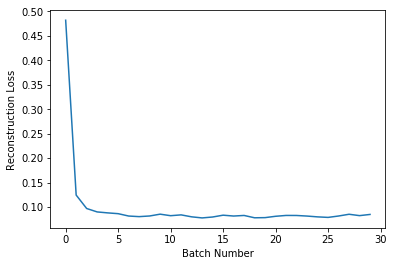

In [21]:
with tf.Session() as sess:

    init_op = tf.global_variables_initializer()
    
    sess.run(init_op) # run the init_op using an interactive session
    
    num_epochs = 5
    batch_size = 100
    total_weights = []
    losses = []
    
    for i_epoch in range(1, num_epochs+1):
        
        for start, end in zip(range(0, len(X_train), batch_size), range(batch_size, len(X_train), batch_size)):
            
            train_batch = X_train[start:end]
            feed_dict = {visible0_state: train_batch, weights: previous_weights, visible_bias: previous_visible_bias, hidden_bias: previous_hidden_bias}
            
            current_weights = sess.run(update_weights, feed_dict=feed_dict)
            current_visible_bias = sess.run(update_visible_bias, feed_dict=feed_dict)
            current_hidden_bias = sess.run(update_hidden_bias, feed_dict=feed_dict)
            
            previous_weights = current_weights
            previous_visible_bias = current_visible_bias
            previous_hidden_bias = current_hidden_bias
            
            if start % 10000 == 0:
                losses.append(sess.run(loss_op, feed_dict=feed_dict))
                total_weights.append(current_weights)
        print(f'Epoch: {i_epoch}, Reconstruction Loss: {losses[-1]}')
    
    plt.plot(losses)
    plt.xlabel('Batch Number')
    plt.ylabel('Reconstruction Loss')
    plt.show()

---